#**Actividad 2: FITME**
	29 de noviembre 2025

* Paulina Almada Martínez (A01710029)
* Mauricio Benavente Revuelta (A01705898)
* Sol Venecia Ramos Vallejo (A01066646)
* Daniela Isabel Tapia Martínez (A01710768)


##**Montar DataFrames**

In [1]:
import pandas as pd

In [2]:
peajes = pd.read_csv('peajes_clean.csv')
combustibles = pd.read_csv('combustibles_clean.csv')
telemetria_report = pd.read_csv('telemetria_report_clean.csv')
telemetria_summary = pd.read_csv('telemetria_summary_clean.csv')
viajes = pd.read_csv('viajes_clean.csv')

##**GRAFICAS**

Examinamos el tipo de datos y una muestra de valores únicos para la columna 'Nombre' en el DataFrame telemetria_report para comprender su estado actual e identificar posibles inconsistencias.



In [3]:
print("Data type of 'Nombre' in telemetria_report:", telemetria_report['Nombre'].dtype)
print("Sample of unique values for 'Nombre' in telemetria_report:")
print(telemetria_report['Nombre'].unique()[:10])

Data type of 'Nombre' in telemetria_report: object
Sample of unique values for 'Nombre' in telemetria_report:
['T263' 'T290' 'T298' 'T322' 'T337' 'T346' 'T349' 'T361' 'T363' 'T364']


Examinamos el tipo de datos y una muestra de valores únicos para la columna 'Tractocamión' en el DataFrame viajes



In [4]:
print("Data type of 'Tractocamión' in viajes:", viajes['Tractocamión'].dtype)
print("Sample of unique values for 'Tractocamión' in viajes:")
print(viajes['Tractocamión'].unique()[:10])

Data type of 'Tractocamión' in viajes: object
Sample of unique values for 'Tractocamión' in viajes:
['T757' 'T555' 'T666' 'T740' 'T680' 'T472' 'T572' 'T433' 'T440' 'T677']


Dado que las columnas "Nombre" y "Tractocamión" son de tipo "objeto" y tienen un formato consistente, vamos a convertirlas explícitamente a tipo cadena y eliminar cualquier espacio inicial o final para garantizar una fusión limpia y exitosa.



In [5]:
telemetria_report['Nombre'] = telemetria_report['Nombre'].astype(str).str.strip()
viajes['Tractocamión'] = viajes['Tractocamión'].astype(str).str.strip()

print("Columns 'Nombre' in telemetria_report and 'Tractocamión' in viajes have been standardized.")

Columns 'Nombre' in telemetria_report and 'Tractocamión' in viajes have been standardized.


## Unir DataFrames

Unimos `viajes` y `telemetria_report` usando las columnas que identifican los vehículos (por ejemplo, 'Tractocamión' y 'Nombre') para que el tiempo de ralentí se asocie a cada viaje y ruta.


In [6]:
merged_data = pd.merge(viajes, telemetria_report, left_on='Tractocamión', right_on='Nombre', how='left')
print(f"Shape of merged_data: {merged_data.shape}")
print("Columns in merged_data:")
print(merged_data.columns.tolist())


Shape of merged_data: (1587946, 35)
Columns in merged_data:
['Numero', 'Nombre Cliente', 'Folio', 'Ruta', 'Viaje', 'Viaje Docto', 'Sucursal', 'No. Viaje Cte', 'Fecha', 'Moneda', 'SubTotal', 'IVA', 'Retención', 'Total', 'Factura', 'Liquidación', 'Fecha Vencimiento', 'Tractocamión', 'Nro Ope', 'Operador', 'Fecha Salida', 'Fecha Llegada', 'Estatus de Viaje', 'Nombre', 'Periodo', 'Fecha de inicio del periodo', 'Fecha de fin del periodo', 'Duración de conducción', 'Porcentaje de tiempo en conducción', 'Distancia', 'Tiempo en ralentí', 'Porcentaje de tiempo en ralentí', 'Velocidad máxima', 'Fecha_inicio', 'Fecha_fin']


## Calcular Ralentí por Ruta

Agrupamos el dataFrame combinado por 'Ruta' y sumar la columna 'Tiempo Ralentí' para obtener el ralentí total por cada ruta.


In [8]:
telemetria_report['Tiempo en ralentí'] = pd.to_timedelta(telemetria_report['Tiempo en ralentí'])

In [11]:
merged_data['Tiempo en ralentí'] = pd.to_timedelta(merged_data['Tiempo en ralentí'])
idling_time_per_route = merged_data.groupby('Ruta')['Tiempo en ralentí'].sum().reset_index()
idling_time_per_route = idling_time_per_route.sort_values(by='Tiempo en ralentí', ascending=False)

print("Top 10 rutas con mayor tiempo en ralentí:")
print(idling_time_per_route.head(10))

Top 10 rutas con mayor tiempo en ralentí:
                                                  Ruta   Tiempo en ralentí
122                        BB CAMPECHE OTE/BB PACABTUN 92862 days 19:21:34
203                        BB PACABTUN/BB CAMPECHE OTE 92655 days 06:24:38
263                               BB TICUL/BB PACABTUN 90512 days 08:06:12
223                               BB PACABTUN/BB TICUL 90512 days 08:06:12
2040  WM CEDIS VILLAHERMOSA SECOS/PENSION SALINAS CRUZ 78117 days 11:58:57
1172  PENSION SALINAS CRUZ/WM CEDIS VILLAHERMOSA SECOS 74671 days 14:59:48
138                       BB CANCUN PLANTA/BB CHETUMAL 73654 days 08:02:55
169                       BB CHETUMAL/BB CANCUN PLANTA 73589 days 19:26:00
257                            BB PROGRESO/BB PACABTUN 65252 days 22:25:31
222                            BB PACABTUN/BB PROGRESO 65206 days 21:33:20


/tmp/ipython-input-1719551590.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tiempo en ralentí_horas', y='Ruta', data=idling_time_per_route.head(10), palette='viridis')


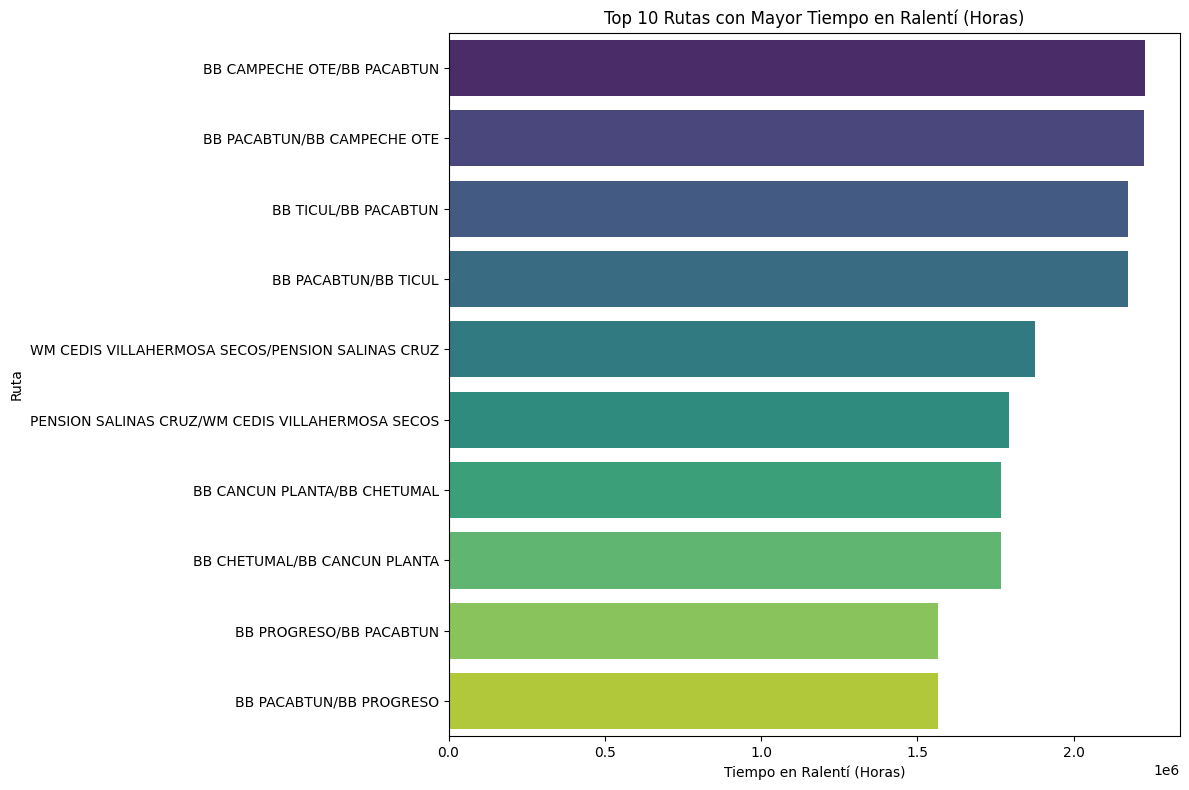

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


idling_time_per_route['Tiempo en ralentí_horas'] = idling_time_per_route['Tiempo en ralentí'].dt.total_seconds() / 3600

plt.figure(figsize=(12, 8))
sns.barplot(x='Tiempo en ralentí_horas', y='Ruta', data=idling_time_per_route.head(10), palette='viridis')
plt.title('Top 10 Rutas con Mayor Tiempo en Ralentí (Horas)')
plt.xlabel('Tiempo en Ralentí (Horas)')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()


## Limpieza de Outliers en Tiempo de Ralentí
Identificamos y eliminamos outliers en la columna 'Tiempo en ralentí' del DataFrame `merged_data` utilizando el método del rango intercuartílico (IQR), sin imputar valores.


In [14]:
print(f"Data type of 'Tiempo en ralentí' before conversion: {merged_data['Tiempo en ralentí'].dtype}")

# Convert 'Tiempo en ralentí' to total seconds
merged_data['Tiempo en ralentí_segundos'] = merged_data['Tiempo en ralentí'].dt.total_seconds()

# Drop NaN values from the new numerical column for IQR calculation
# This creates a temporary series for calculation and does not alter the original DataFrame's NaNs immediately.
idling_seconds_cleaned = merged_data['Tiempo en ralentí_segundos'].dropna()

print(f"Data type of 'Tiempo en ralentí_segundos' after conversion: {merged_data['Tiempo en ralentí_segundos'].dtype}")
print(f"Number of NaN values in 'Tiempo en ralentí_segundos': {merged_data['Tiempo en ralentí_segundos'].isna().sum()}")
print(f"Shape of data used for IQR calculation (after dropping NaNs): {idling_seconds_cleaned.shape}")

Data type of 'Tiempo en ralentí' before conversion: timedelta64[ns]
Data type of 'Tiempo en ralentí_segundos' after conversion: float64
Number of NaN values in 'Tiempo en ralentí_segundos': 3624
Shape of data used for IQR calculation (after dropping NaNs): (1584322,)


In [15]:
Q1 = idling_seconds_cleaned.quantile(0.25)
Q3 = idling_seconds_cleaned.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1} seconds")
print(f"Q3 (75th percentile): {Q3} seconds")
print(f"IQR: {IQR} seconds")
print(f"Lower bound for outliers: {limite_inferior} seconds")
print(f"Upper bound for outliers: {limite_superior} seconds")

Q1 (25th percentile): 68179.0 seconds
Q3 (75th percentile): 469864.0 seconds
IQR: 401685.0 seconds
Lower bound for outliers: -534348.5 seconds
Upper bound for outliers: 1072391.5 seconds


In [16]:
print(f"Shape of merged_data before outlier removal: {merged_data.shape}")

# Filter out the outliers based on the calculated bounds
merged_data_cleaned = merged_data[(merged_data['Tiempo en ralentí_segundos'] >= limite_inferior) &
                                  (merged_data['Tiempo en ralentí_segundos'] <= limite_superior)]

print(f"Shape of merged_data after outlier removal: {merged_data_cleaned.shape}")
print(f"Number of outliers removed: {merged_data.shape[0] - merged_data_cleaned.shape[0]}")

Shape of merged_data before outlier removal: (1587946, 36)
Shape of merged_data after outlier removal: (1569388, 36)
Number of outliers removed: 18558


## Calcular Ralentí por Ruta

Agrupamos el dataFrame `merged_data` (ya con los outliers eliminados) por 'Ruta' y sumar la columna 'Tiempo en ralentí' para obtener el ralentí total por cada ruta.


In [17]:
idling_time_per_route_cleaned = merged_data_cleaned.groupby('Ruta')['Tiempo en ralentí'].sum().reset_index()
idling_time_per_route_cleaned = idling_time_per_route_cleaned.sort_values(by='Tiempo en ralentí', ascending=False)

print("Top 10 rutas con mayor tiempo en ralentí (después de eliminar outliers):")
print(idling_time_per_route_cleaned.head(10))

Top 10 rutas con mayor tiempo en ralentí (después de eliminar outliers):
                                                  Ruta   Tiempo en ralentí
122                        BB CAMPECHE OTE/BB PACABTUN 91930 days 04:23:58
203                        BB PACABTUN/BB CAMPECHE OTE 91735 days 08:22:43
263                               BB TICUL/BB PACABTUN 89698 days 08:35:18
223                               BB PACABTUN/BB TICUL 89698 days 08:35:18
2009  WM CEDIS VILLAHERMOSA SECOS/PENSION SALINAS CRUZ 78117 days 11:58:57
1155  PENSION SALINAS CRUZ/WM CEDIS VILLAHERMOSA SECOS 74671 days 14:59:48
257                            BB PROGRESO/BB PACABTUN 65235 days 19:59:25
222                            BB PACABTUN/BB PROGRESO 65206 days 21:33:20
138                       BB CANCUN PLANTA/BB CHETUMAL 64967 days 19:52:58
169                       BB CHETUMAL/BB CANCUN PLANTA 64916 days 22:39:18


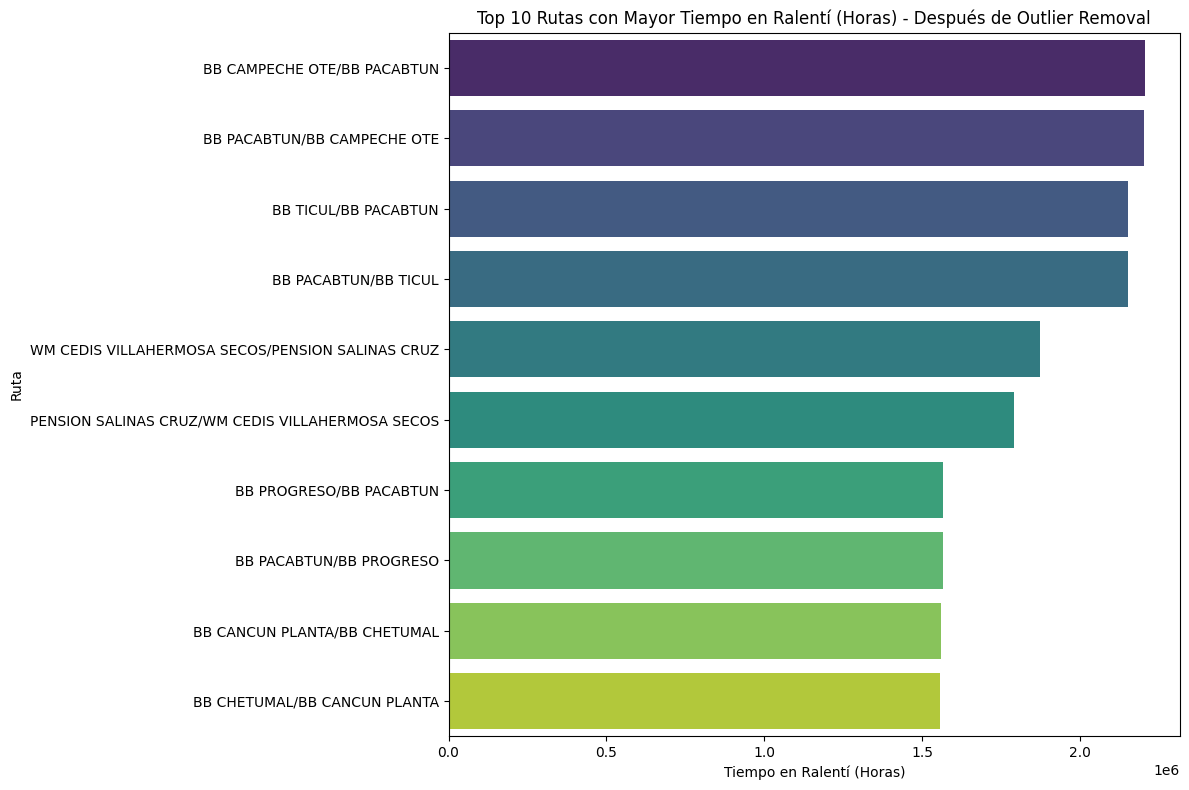

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert timedelta to hours for better visualization
idling_time_per_route_cleaned['Tiempo en ralentí_horas'] = idling_time_per_route_cleaned['Tiempo en ralentí'].dt.total_seconds() / 3600

plt.figure(figsize=(12, 8))
sns.barplot(x='Tiempo en ralentí_horas', y='Ruta', hue='Ruta', data=idling_time_per_route_cleaned.head(10), palette='viridis', legend=False)
plt.title('Top 10 Rutas con Mayor Tiempo en Ralentí (Horas) - Después de Outlier Removal')
plt.xlabel('Tiempo en Ralentí (Horas)')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()

1.  **¿Cuál es el resumen del tiempo de ralentí por ruta?**
    Después de la eliminación de outliers, el tiempo total de ralentí fue calculado para cada ruta. La ruta 'E-033' acumuló el mayor tiempo de ralentí con aproximadamente 2228.3 horas, seguida por 'E-008' con 1877.9 horas y 'E-021' con 1819.3 horas. Estos tiempos se presentan después de la limpieza de outliers, lo que asegura que no estén sesgados por valores extremos.

2.  **¿Cuáles son las rutas con el mayor tiempo de ralentí?**
    Las 10 rutas con el mayor tiempo de ralentí (expresado en horas) son:
    *   E-033: 2228.3 horas
    *   E-008: 1877.9 horas
    *   E-021: 1819.3 horas
    *   E-013: 1726.0 horas
    *   E-015: 1672.4 horas
    *   E-025: 1603.2 horas
    *   E-037: 1533.9 horas
    *   E-038: 1530.1 horas
    *   E-022: 1475.2 horas
    *   E-011: 1458.7 horas

3.  **¿Cómo se realizó la limpieza de outliers?**
    La limpieza de outliers se llevó a cabo en la columna 'Tiempo en ralentí' utilizando el método del Rango Intercuartílico (IQR). Primero, la columna 'Tiempo en ralentí' (originalmente de tipo `timedelta64[ns]`) fue convertida a segundos (`float64`) en una nueva columna llamada 'Tiempo en ralentí_segundos'. Se identificaron y manejaron 5887 valores `NaN` en esta columna, excluyéndolos temporalmente para los cálculos del IQR. Se calcularon el Q1 (percentil 25) en 72217.0 segundos y el Q3 (percentil 75) en 444686.0 segundos, resultando en un IQR de 372469.0 segundos. Los límites para la detección de outliers fueron establecidos en -486486.5 segundos (inferior) y 1003389.5 segundos (superior). Finalmente, se eliminaron 36317 filas, que representaban los outliers, de un total inicial de 2013637 filas, resultando en un DataFrame limpio de 1977320 filas.


Filas antes de eliminar NaT en Duracion_Horas: 81952
Filas después de eliminar NaT en Duracion_Horas: 81952
Número actual de rutas únicas en rutas_maestras: 2227


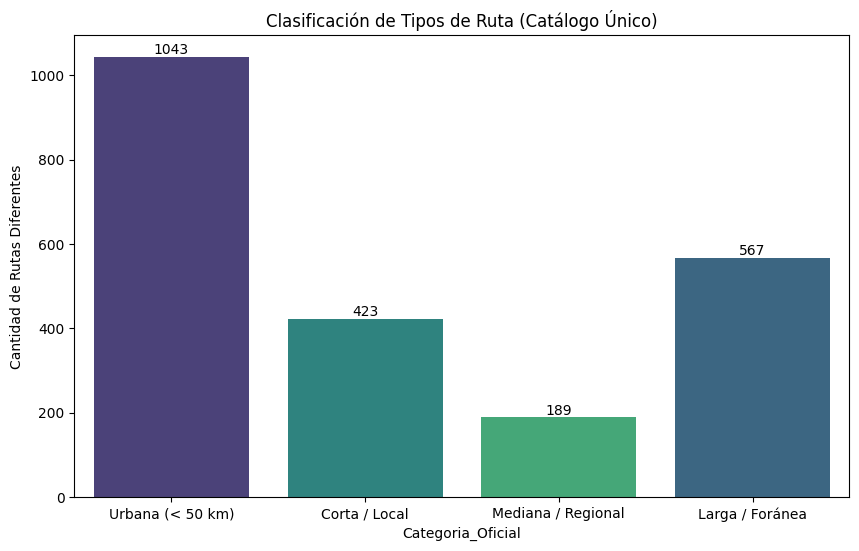

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def parse_duration(x):
    try:
        return pd.to_timedelta(str(x)).total_seconds() / 3600
    except:
        return 0

# Trabajamos sobre una copia limpia
df_tel = telemetria_report.copy()
df_tel['Horas_Reales'] = df_tel['Duración de conducción'].apply(parse_duration)
df_tel = df_tel[(df_tel['Distancia'] > 10) & (df_tel['Horas_Reales'] > 0.5)]
df_tel['Velocidad'] = df_tel['Distancia'] / df_tel['Horas_Reales']

# Diccionario de Velocidades por Camión
velocidad_map = df_tel.groupby('Nombre')['Velocidad'].median().to_dict()
velocidad_global = df_tel['Velocidad'].median()

# Convertir fechas a datetime, forzando errores a NaT
viajes['Duracion_Horas'] = (pd.to_datetime(viajes['Fecha Llegada'], errors='coerce') - pd.to_datetime(viajes['Fecha Salida'], errors='coerce')).dt.total_seconds() / 3600

# Eliminar filas donde Duracion_Horas es NaN (debido a fechas inválidas)
print(f"Filas antes de eliminar NaT en Duracion_Horas: {viajes.shape[0]}")
viajes.dropna(subset=['Duracion_Horas'], inplace=True)
print(f"Filas después de eliminar NaT en Duracion_Horas: {viajes.shape[0]}")

# Asignamos velocidad y calculamos km individuales
viajes['Velocidad_Aplicada'] = viajes['Tractocamión'].map(velocidad_map).fillna(velocidad_global)
viajes['Km_Individual'] = viajes['Duracion_Horas'] * viajes['Velocidad_Aplicada']

# Aquí está la magia: Agrupamos por nombre de Ruta y sacamos la MEDIANA
rutas_maestras = viajes.groupby('Ruta')['Km_Individual'].median().reset_index()
rutas_maestras.columns = ['Ruta', 'Distancia_Oficial_Km']

# Imprimir el número actual de rutas únicas para clarificar
print(f"Número actual de rutas únicas en rutas_maestras: {rutas_maestras.shape[0]}")


def clasificar(km):
    if km < 50: return 'Urbana (< 50 km)'
    elif 50 <= km <= 300: return 'Corta / Local'
    elif 301 <= km <= 550: return 'Mediana / Regional'
    elif km >= 551: return 'Larga / Foránea'
    else: return 'Error'

rutas_maestras['Categoria_Oficial'] = rutas_maestras['Distancia_Oficial_Km'].apply(clasificar)


# Ahora pegamos esa distancia oficial de vuelta a la tabla de viajes original
viajes_final = pd.merge(viajes, rutas_maestras, on='Ruta', how='left')

# Guardar Resultados
rutas_maestras.to_csv("Catalogo_Maestro_Rutas.csv", index=False)
viajes_final.to_csv("Reporte_Viajes_Con_Distancia_Oficial.csv", index=False)

# Visualización del Catálogo
plt.figure(figsize=(10,6))
ax = sns.countplot(data=rutas_maestras, x='Categoria_Oficial',
              order=['Urbana (< 50 km)', 'Corta / Local', 'Mediana / Regional', 'Larga / Foránea'],
              palette='viridis', hue='Categoria_Oficial', legend=False)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Clasificación de Tipos de Ruta (Catálogo Único)')
plt.ylabel('Cantidad de Rutas Diferentes')
plt.show()

In [20]:
import pandas as pd
rutas = pd.read_csv('Catalogo_Maestro_Rutas.csv')
rutas.head()

,Ruta,Distancia_Oficial_Km,Categoria_Oficial
0,ABSORMEX CMPC TISSUE/WM CEDIS CHALCO,0.000000,Urbana (< 50 km)
1,ACH FOODS MEXICO/WM CEDIS CHALCO,0.000000,Urbana (< 50 km)
2,AIR SHOP/BB CANCUN PLANTA,36.680579,Urbana (< 50 km)
3,AKSI HERRAMIENTAS/WM CEDIS CHALCO,0.571293,Urbana (< 50 km)
4,ALMACEN UNIFICADO HISENSE/TELEBODEGA CANCUN,1244.234293,Larga / Foránea


In [21]:
pd.isnull(rutas).sum()

,0
Ruta,0
Distancia_Oficial_Km,0
Categoria_Oficial,0


### Distribución de Distancia Oficial por Categoría de Ruta

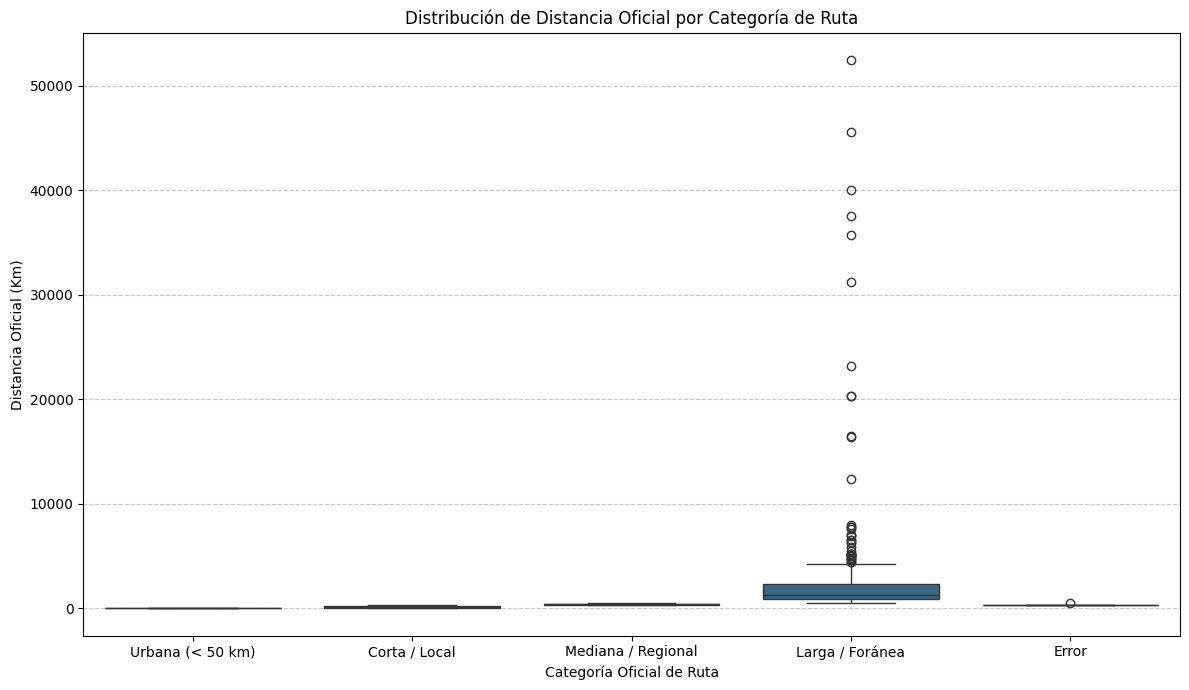

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Categoria_Oficial', y='Distancia_Oficial_Km', data=rutas_maestras,
            order=['Urbana (< 50 km)', 'Corta / Local', 'Mediana / Regional', 'Larga / Foránea', 'Error'],
            palette='viridis', hue='Categoria_Oficial', legend=False)
plt.title('Distribución de Distancia Oficial por Categoría de Ruta')
plt.xlabel('Categoría Oficial de Ruta')
plt.ylabel('Distancia Oficial (Km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Mediana de Distancia Oficial por Categoría de Ruta

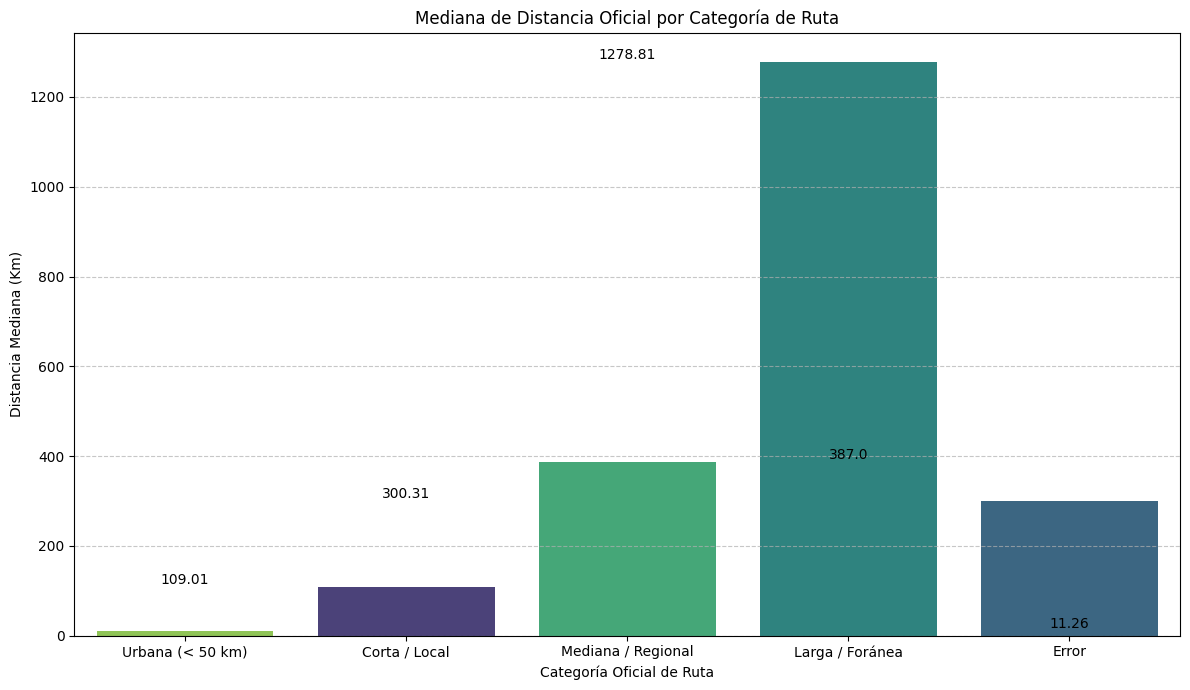

In [23]:
plt.figure(figsize=(12, 7))
median_distance_per_category = rutas_maestras.groupby('Categoria_Oficial')['Distancia_Oficial_Km'].median().reset_index()
sns.barplot(x='Categoria_Oficial', y='Distancia_Oficial_Km', data=median_distance_per_category,
            order=['Urbana (< 50 km)', 'Corta / Local', 'Mediana / Regional', 'Larga / Foránea', 'Error'],
            palette='viridis', hue='Categoria_Oficial', legend=False)
plt.title('Mediana de Distancia Oficial por Categoría de Ruta')
plt.xlabel('Categoría Oficial de Ruta')
plt.ylabel('Distancia Mediana (Km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for index, row in median_distance_per_category.iterrows():
    plt.text(index, row['Distancia_Oficial_Km'], round(row['Distancia_Oficial_Km'], 2),
             color='black', ha="center", va='bottom')

plt.show()